In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import os

In [3]:
from cellpose_omni import models, core
from cellpose_omni import plot

2023-02-20 15:02:19,032 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [4]:
import omnipose
from cellpose_omni import models
from glob import glob
from natsort import natsorted

In [5]:

# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you
# are only processing a few images.
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

import tifffile
from skimage.transform import rescale, resize, downscale_local_mean

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

2023-02-20 15:02:29,560 [INFO] ** TORCH GPU version installed and working. **
>>> GPU activated? 1


In [6]:
from PIL import Image

In [16]:
test_data_dir = "superres/first_trial/omnipose_training/pmc_0.1092_linear/test/"
test_data_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/test/convolutions_tiled/"
save_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/test/segmentations_tiled"
mask_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.0655/test/masks"
mask = sorted(glob(test_data_dir + "masks_linear/*"))
mask = sorted(glob(test_data_dir + "/*"))
conv = sorted(glob(test_data_dir + "convolutions_linear/*"))
conv = sorted(glob(test_data_dir + "/*"))
masks = [np.asarray(Image.open(file)) for file in mask]
convs = [np.asarray(Image.open(file)) for file in conv]

(256, 1840)
(256, 1840)
(256, 1840)
(256, 1840)
(256, 1840)


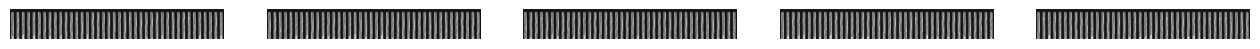

In [17]:
from cellpose_omni import io, transforms
from omnipose.utils import normalize99
imgs = convs
nimg = len(imgs)
fig = plt.figure(figsize=[16,12]) # initialize figure
for k in range(len(imgs)):
    print(imgs[k].shape)
    img = transforms.move_min_dim(imgs[k]) # move the channel dimension last
    if len(img.shape)>2:
        imgs[k] = np.mean(img,axis=-1) # or just turn into grayscale

    imgs[k] = normalize99(imgs[k])
    plt.subplot(1,len(imgs),k+1)
    plt.imshow(imgs[k],cmap='gray')
    plt.axis('off')

In [18]:
model_list = natsorted(glob("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/train/models/*"))
model_name = model_list[5]
print(type(model_name), model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True,concatenation=True)

<class 'str'> C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/train/models\cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_pmc_0.1092_SR_2023_02_20_02_20_45.341291_epoch_499
2023-02-20 16:08:58,554 [INFO] ** TORCH GPU version installed and working. **
2023-02-20 16:08:58,554 [INFO] >>>> using GPU
type <class 'cellpose_omni.resnet_torch.CPnet'>
OrderedDict([('downsample.down.res_down_0.conv.conv_0.0.weight', tensor([6.5028, 0.2662], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.bias', tensor([ 2.6291, -0.7289], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.running_mean', tensor([0.3620, 0.6320], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.running_var', tensor([0.1063, 0.2326], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.num_batches_tracked', tensor(6500, device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.2.weight', tensor([[[[-4.6306e

In [19]:
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

2023-02-20 16:09:01,631 [INFO] 0%|          | 0/5 [00:00<?, ?it/s]
OrderedDict([('downsample.down.res_down_0.conv.conv_0.0.weight', tensor([6.5028, 0.2662], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.bias', tensor([ 2.6291, -0.7289], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.running_mean', tensor([0.3620, 0.6320], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.running_var', tensor([0.1063, 0.2326], device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.0.num_batches_tracked', tensor(6500, device='cuda:0')), ('downsample.down.res_down_0.conv.conv_0.2.weight', tensor([[[[-4.6306e+00, -8.5751e-01,  3.2116e-01],
          [-2.8106e+00,  2.9138e+00,  5.3597e+00],
          [-2.9858e+00,  3.3717e+00,  1.0771e+01]],

         [[-1.9544e-02,  2.1634e-02, -1.1672e-01],
          [ 2.0198e-01, -9.0113e-03, -2.5773e-01],
          [ 6.2919e-02, -5.3929e-02, -3.0545e-01]]],


        [[[-6.8676e-01, -9.7586e-01,  1.4820e+00],
          [-2

In [20]:
os.mkdir(f"{test_data_dir}/omnipose segmentations")
print(n)
for idx,i in enumerate(n):

    maski = masks[idx]
    flowi = flows[idx][0]
    print(maski.shape)
    im = Image.fromarray(maski)
    im.save(f"{save_dir}/mask_{str(idx).zfill(5)}.png")
    
    # fig = plt.figure(figsize=(10,12))
    # plot.show_segmentation(fig, omnipose.utils.normalize99(imgs[i]), maski, flowi, channels=chans, omni=True, bg_color=0)

    # plt.tight_layout()
    # plt.savefig(f"fluo/60x test/omnipose images/{str(idx).zfill(4)}.png", dpi = 120)
    # plt.show()

range(0, 5)
(256, 1840)
(256, 1840)
(256, 1840)
(256, 1840)
(256, 1840)


In [12]:
import torch
print(torch.cuda.is_available())
torch.zeros(1).cuda()

True


tensor([0.], device='cuda:0')

In [8]:
some = ["a","a_masks","b","b_masks","c","c_masks","d","d_masks"]

In [12]:
mask = [thing for thing in some if "mask" not in thing]

In [13]:
mask

['a', 'b', 'c', 'd']